In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


# Data Cleaning


In [3]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#read the file
customers_df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Data_science_guvi\projects\Global Electronics data set\Customers.csv", encoding='ISO-8859-1')
exchange_rates_df= pd.read_csv(r"C:\Users\LENOVO\Desktop\Data_science_guvi\projects\Global Electronics data set\Exchange_Rates.csv", encoding='ISO-8859-1')
products_df= pd.read_csv(r"C:\Users\LENOVO\Desktop\Data_science_guvi\projects\Global Electronics data set\Products.csv", encoding='ISO-8859-1')
sales_df= pd.read_csv(r"C:\Users\LENOVO\Desktop\Data_science_guvi\projects\Global Electronics data set\Sales.csv", encoding='ISO-8859-1')
stores_df= pd.read_csv(r"C:\Users\LENOVO\Desktop\Data_science_guvi\projects\Global Electronics data set\Stores.csv", encoding='ISO-8859-1')

In [6]:
customers_df.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [7]:
#checking for numbers of columns
customers_df.columns

Index(['CustomerKey', 'Gender', 'Name', 'City', 'State Code', 'State',
       'Zip Code', 'Country', 'Continent', 'Birthday'],
      dtype='object')

In [8]:
# Rename the columns
customers_df.rename(columns={"CustomerKey":"Customer Key"},inplace=True)
customers_df.rename(columns={"Birthday":"DOB"},inplace=True)

In [9]:
# confirm the change
customers_df.columns

Index(['Customer Key', 'Gender', 'Name', 'City', 'State Code', 'State',
       'Zip Code', 'Country', 'Continent', 'DOB'],
      dtype='object')

In [10]:
exchange_rates_df.columns

Index(['Date', 'Currency', 'Exchange'], dtype='object')

In [11]:
products_df.columns

Index(['ProductKey', 'Product Name', 'Brand', 'Color', 'Unit Cost USD',
       'Unit Price USD', 'SubcategoryKey', 'Subcategory', 'CategoryKey',
       'Category'],
      dtype='object')

In [12]:
products_df.rename(columns={"ProductKey":"Product Key"},inplace=True)
products_df.rename(columns={"Colour":"Color"},inplace=True)
products_df.rename(columns={"SubcategoryKey":"Sub Category Key"},inplace=True)
products_df.rename(columns={"Subcategory":"Sub Category"},inplace=True)
products_df.rename(columns={"CategoryKey":"Category Key"},inplace=True)

In [13]:
products_df.columns

Index(['Product Key', 'Product Name', 'Brand', 'Color', 'Unit Cost USD',
       'Unit Price USD', 'Sub Category Key', 'Sub Category', 'Category Key',
       'Category'],
      dtype='object')

In [14]:
sales_df.columns

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code'],
      dtype='object')

In [15]:
sales_df.rename(columns={"CustomerKey":"Customer Key"},inplace=True)
sales_df.rename(columns={"StoreKey":"Store Key"},inplace=True)
sales_df.rename(columns={"ProductKey":"Product Key"},inplace=True)

In [16]:
sales_df.columns

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'Customer Key', 'Store Key', 'Product Key', 'Quantity',
       'Currency Code'],
      dtype='object')

In [17]:
stores_df.columns

Index(['StoreKey', 'Country', 'State', 'Square Meters', 'Open Date'], dtype='object')

In [18]:
stores_df.rename(columns={"StoreKey":"Store Key"},inplace=True)

In [19]:
stores_df.columns

Index(['Store Key', 'Country', 'State', 'Square Meters', 'Open Date'], dtype='object')

In [20]:
# To check the missing values
customers_df.isnull().sum()

Customer Key     0
Gender           0
Name             0
City             0
State Code      10
State            0
Zip Code         0
Country          0
Continent        0
DOB              0
dtype: int64

In [21]:
# Replacing missig values
customers_df['State Code'].fillna('Not known', inplace=True)

In [22]:
customers_df.isnull().sum()

Customer Key    0
Gender          0
Name            0
City            0
State Code      0
State           0
Zip Code        0
Country         0
Continent       0
DOB             0
dtype: int64

In [23]:
exchange_rates_df.isnull().sum()

Date        0
Currency    0
Exchange    0
dtype: int64

In [24]:
products_df.isnull().sum()

Product Key         0
Product Name        0
Brand               0
Color               0
Unit Cost USD       0
Unit Price USD      0
Sub Category Key    0
Sub Category        0
Category Key        0
Category            0
dtype: int64

In [25]:
sales_df.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
Customer Key         0
Store Key            0
Product Key          0
Quantity             0
Currency Code        0
dtype: int64

In [26]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'], format='%m/%d/%Y')
sales_df['Delivery Date'] = pd.to_datetime(sales_df['Delivery Date'], format='%m/%d/%Y', errors='coerce')


In [27]:
print(sales_df['Delivery Date'].isnull().sum())


49719


In [28]:
# Calculate Delivery Days directly
sales_df['Delivery Days'] = (sales_df['Delivery Date'] - sales_df['Order Date']).dt.days

# Compute the average delivery days for rows with valid values
average_delivery_days = sales_df['Delivery Days'].mean()

# Fill missing Delivery Date with Order Date + average delivery days
missing_delivery_date_mask = sales_df['Delivery Date'].isnull()
sales_df.loc[missing_delivery_date_mask, 'Delivery Date'] = (
    sales_df['Order Date'] + pd.to_timedelta(average_delivery_days, unit='days')
)

# Update Delivery Days where they were previously NaN
sales_df['Delivery Days'] = (sales_df['Delivery Date'] - sales_df['Order Date']).dt.days

# Extract only the date component
sales_df['Order Date'] = sales_df['Order Date'].dt.date
sales_df['Delivery Date'] = sales_df['Delivery Date'].dt.date

# Drop rows with any null values in the stores DataFrame
stores_df.dropna(inplace=True)

In [29]:
sales_df.isnull().sum()

Order Number     0
Line Item        0
Order Date       0
Delivery Date    0
Customer Key     0
Store Key        0
Product Key      0
Quantity         0
Currency Code    0
Delivery Days    0
dtype: int64

In [30]:
stores_df.isnull().sum()

Store Key        0
Country          0
State            0
Square Meters    0
Open Date        0
dtype: int64

In [31]:
def date_conversion(df, date_columns):
    for column in date_columns:
        if column in df.columns:
            df[column] = pd.to_datetime(df[column], errors='coerce').dt.strftime('%Y-%m-%d')
    return df

In [32]:
customers_df = date_conversion(customers_df, ['DOB'])
exchange_rates_df = date_conversion(exchange_rates_df, ['Date'])
sales_df = date_conversion(sales_df, ['Order Date', 'Delivery Date'])
stores_df = date_conversion(stores_df, ['Open Date'])

In [33]:
def currency_conversion(df, column_name):
    if column_name in df.columns:
        # Remove dollar signs and extra spaces, then convert to numeric
        df[column_name] = df[column_name].replace('[\$,]', '', regex=True).astype(float)
    return df


In [34]:
products_df = currency_conversion(products_df, 'Unit Cost USD')
products_df = currency_conversion(products_df, 'Unit Price USD')


In [35]:
!pip install --upgrade sqlalchemy



In [36]:
import sqlalchemy
print(sqlalchemy.__version__)


2.0.34


In [37]:
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus

password = 'Qdpfp7xsm2@'
encoded_password = quote_plus(password)

# Replace the placeholders with your MySQL credentials
username = 'root'
password = encoded_password
host = 'localhost'
port = '3306'  # Default MySQL port
database = 'global_electronics'

from urllib.parse import quote_plus

#password = 'Qdpfp7xsm2@'
encoded_password = quote_plus(password)



# Create the connection engine
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')

# Insert customers_df into the 'customers' table
customers_df.to_sql('customers', con=engine, index=False, if_exists='replace')

# Insert exchange_rates_df into the 'exchange_rates' table
exchange_rates_df.to_sql('exchange_rates', con=engine, index=False, if_exists='replace')

# Insert products_df into the 'products' table
products_df.to_sql('products', con=engine, index=False, if_exists='replace')

# Insert sales_df into the 'sales' table
sales_df.to_sql('sales', con=engine, index=False, if_exists='replace')

# Insert stores_df into the 'stores' table
stores_df.to_sql('stores', con=engine, index=False, if_exists='replace')






66

In [38]:
pip install pyodbc pandas sqlalchemy


Note: you may need to restart the kernel to use updated packages.


In [39]:
import pyodbc
from sqlalchemy import create_engine
from urllib.parse import quote_plus

password = 'Qdpfp7xsm2@'
encoded_password = quote_plus(password)


# Replace with your actual SQL Server details
server = 'LAPTOP-FSD9QOI3\SQLEXPRESS'
database = 'global_electronics'
username = 'sa'
password = encoded_password
driver = 'ODBC Driver 17 for SQL Server'  # or 'ODBC Driver 17 for SQL Server' for newer versions

# Connection string
connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver={driver}'

# Create the SQLAlchemy engine
engine = create_engine(connection_string)

# Assuming your DataFrames are already defined as customers_df, exchange_rates_df, etc.

# Insert customers_df into SQL Server
customers_df.to_sql('Customers', engine, if_exists='replace', index=False)

# Insert exchange_rates_df into SQL Server
exchange_rates_df.to_sql('ExchangeRates', engine, if_exists='replace', index=False)

# Insert products_df into SQL Server
products_df.to_sql('Products', engine, if_exists='replace', index=False)

# Insert sales_df into SQL Server
sales_df.to_sql('Sales', engine, if_exists='replace', index=False)

# Insert stores_df into SQL Server
stores_df.to_sql('Stores', engine, if_exists='replace', index=False)


66

In [40]:
# Example of querying the 'customers' table
customers_from_db = pd.read_sql('SELECT * FROM customers', con=engine)
print(customers_from_db.head())


   Customer Key  Gender               Name            City State Code  \
0           301  Female      Lilly Harding  WANDEARAH EAST         SA   
1           325  Female       Madison Hull      MOUNT BUDD         WA   
2           554  Female      Claire Ferres       WINJALLOK        VIC   
3           786    Male  Jai Poltpalingada    MIDDLE RIVER         SA   
4          1042    Male    Aidan Pankhurst   TAWONGA SOUTH        VIC   

               State Zip Code    Country  Continent         DOB  
0    South Australia     5523  Australia  Australia  1939-07-03  
1  Western Australia     6522  Australia  Australia  1979-09-27  
2           Victoria     3380  Australia  Australia  1947-05-26  
3    South Australia     5223  Australia  Australia  1957-09-17  
4           Victoria     3698  Australia  Australia  1965-11-19  


# EDA

In [43]:
print(customers_df.describe(include='all'))

        Customer Key Gender        Name     City State Code       State  \
count   1.526600e+04  15266       15266    15266      15266       15266   
unique           NaN      2       15118     8258        468         512   
top              NaN   Male  John Smith  Toronto         CA  California   
freq             NaN   7748           4      204        740         715   
mean    1.060508e+06    NaN         NaN      NaN        NaN         NaN   
std     6.127097e+05    NaN         NaN      NaN        NaN         NaN   
min     3.010000e+02    NaN         NaN      NaN        NaN         NaN   
25%     5.140335e+05    NaN         NaN      NaN        NaN         NaN   
50%     1.079244e+06    NaN         NaN      NaN        NaN         NaN   
75%     1.593980e+06    NaN         NaN      NaN        NaN         NaN   
max     2.099937e+06    NaN         NaN      NaN        NaN         NaN   

       Zip Code        Country      Continent         DOB  
count     15266          15266         

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

#Set Seaborn style for better visuals
sns.set(style="whitegrid")


# 1. Customer Analysis

# Demographic Distribution

# Gender Distribution:

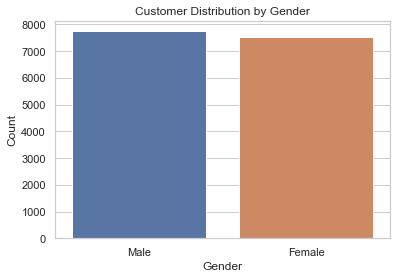

In [45]:
gender_dist = customers_df['Gender'].value_counts()
sns.barplot(x=gender_dist.index, y=gender_dist.values)
plt.title('Customer Distribution by Gender')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.show()


# Age Distribution:

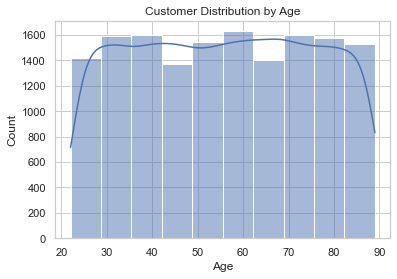

In [46]:
customers_df['DOB'] = pd.to_datetime(customers_df['DOB'])
customers_df['Age'] = datetime.now().year - customers_df['DOB'].dt.year
sns.histplot(customers_df['Age'], bins=10, kde=True)
plt.title('Customer Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


# Location Distribution:

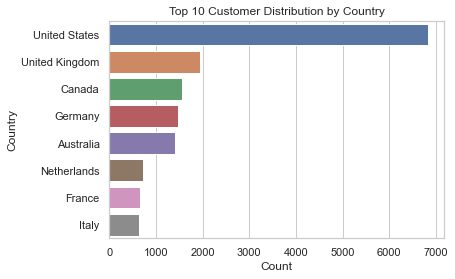

In [47]:
location_dist = customers_df['Country'].value_counts().head(10)
sns.barplot(x=location_dist.values, y=location_dist.index)
plt.title('Top 10 Customer Distribution by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


# Purchase Patterns

# Average Order Value:

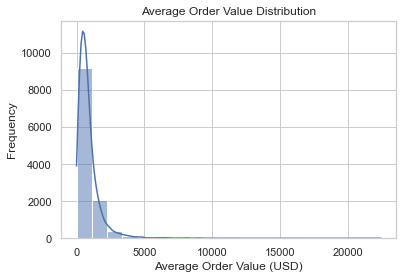

In [48]:
merged_sales_products = pd.merge(sales_df, products_df, on='Product Key')
merged_sales_products['Order Value'] = merged_sales_products['Quantity'] * merged_sales_products['Unit Price USD']
avg_order_value = merged_sales_products.groupby('Customer Key')['Order Value'].mean()

sns.histplot(avg_order_value, bins=20, kde=True)
plt.title('Average Order Value Distribution')
plt.xlabel('Average Order Value (USD)')
plt.ylabel('Frequency')
plt.show()


# Purchase Frequency:

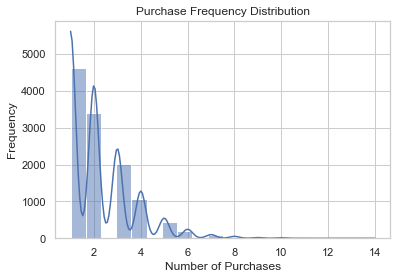

In [49]:
purchase_frequency = sales_df.groupby('Customer Key')['Order Number'].nunique()

sns.histplot(purchase_frequency, bins=20, kde=True)
plt.title('Purchase Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.show()


# Segmentation

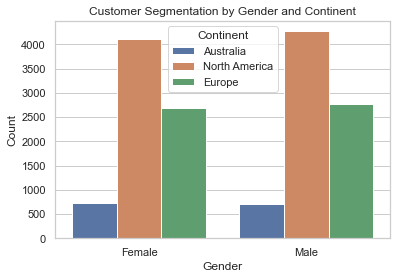

In [50]:
sns.countplot(x='Gender', hue='Continent', data=customers_df)
plt.title('Customer Segmentation by Gender and Continent')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.show()


# 2. Sales Analysis

# Overall Sales Performance (Time Series)

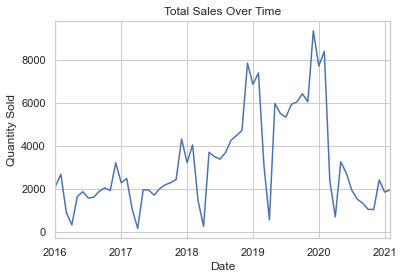

In [51]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])
sales_over_time = sales_df.groupby(sales_df['Order Date'].dt.to_period('M'))['Quantity'].sum()

sales_over_time.plot(kind='line')
plt.title('Total Sales Over Time')
plt.ylabel('Quantity Sold')
plt.xlabel('Date')
plt.show()


# Sales by Product

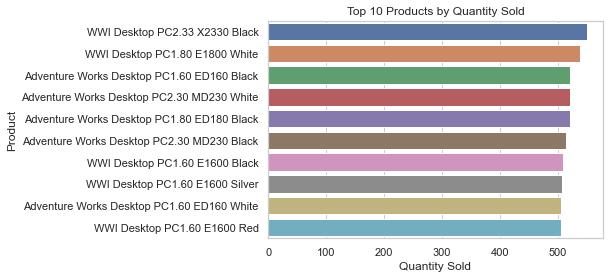

In [52]:
product_sales = merged_sales_products.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=product_sales.values, y=product_sales.index)
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.show()


# Sales by Store

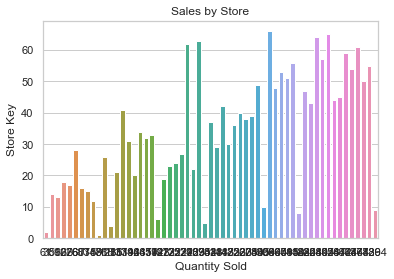

In [53]:
sales_by_store = pd.merge(sales_df, stores_df, on='Store Key')
store_sales = sales_by_store.groupby('Store Key')['Quantity'].sum()

sns.barplot(x=store_sales.values, y=store_sales.index)
plt.title('Sales by Store')
plt.xlabel('Quantity Sold')
plt.ylabel('Store Key')
plt.show()


# Sales by Currency (Considering Exchange Rates)

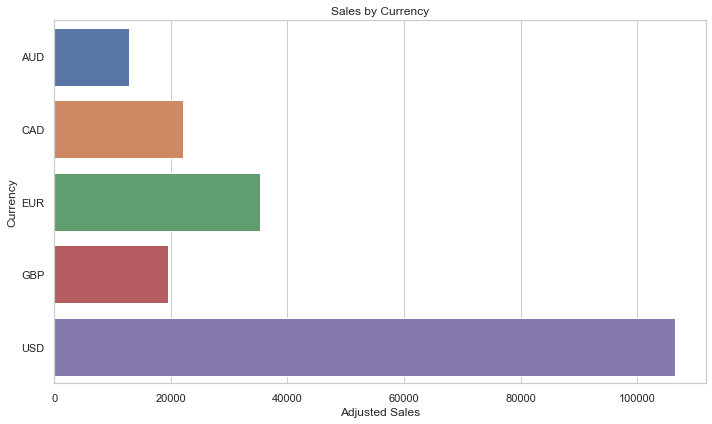

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert date columns to datetime type
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])
exchange_rates_df['Date'] = pd.to_datetime(exchange_rates_df['Date'])

# Merge the dataframes
sales_currency = pd.merge(sales_df, exchange_rates_df, left_on=['Order Date', 'Currency Code'], right_on=['Date', 'Currency'])

# Calculate Adjusted Sales
sales_currency['Adjusted Sales'] = sales_currency['Quantity'] * sales_currency['Exchange']

# Group by Currency and sum Adjusted Sales
currency_sales = sales_currency.groupby('Currency')['Adjusted Sales'].sum()

# Plot the results
plt.figure(figsize=(10, 6))  # Optional: Adjust size if needed
sns.barplot(x=currency_sales.values, y=currency_sales.index)
plt.title('Sales by Currency')
plt.xlabel('Adjusted Sales')
plt.ylabel('Currency')
plt.tight_layout()
plt.show()


# 3. Product Analysis

# Product Popularity

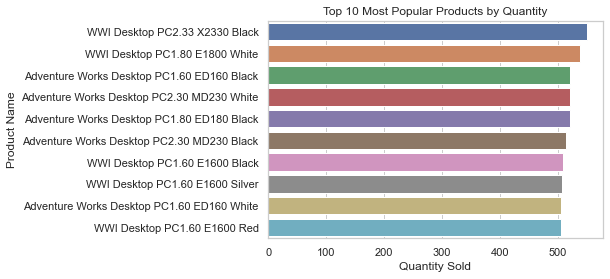

In [55]:
product_popularity = merged_sales_products.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=product_popularity.values, y=product_popularity.index)
plt.title('Top 10 Most Popular Products by Quantity')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()


# Profitability Analysis

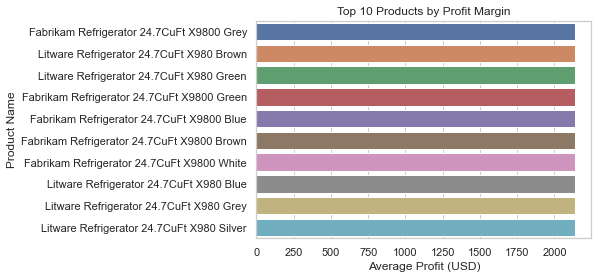

In [56]:
merged_sales_products['Profit'] = merged_sales_products['Unit Price USD'] - merged_sales_products['Unit Cost USD']
product_profit = merged_sales_products.groupby('Product Name')['Profit'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=product_profit.values, y=product_profit.index)
plt.title('Top 10 Products by Profit Margin')
plt.xlabel('Average Profit (USD)')
plt.ylabel('Product Name')
plt.show()


# Category Analysis

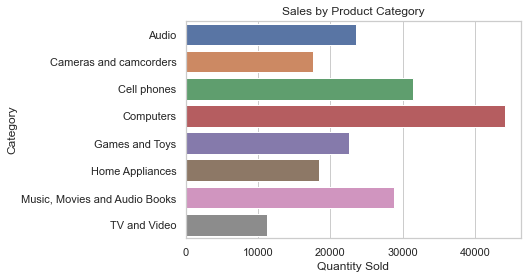

In [57]:
category_sales = merged_sales_products.groupby('Category')['Quantity'].sum()

sns.barplot(x=category_sales.values, y=category_sales.index)
plt.title('Sales by Product Category')
plt.xlabel('Quantity Sold')
plt.ylabel('Category')
plt.show()


# 4. Store Analysis

# Store Performance

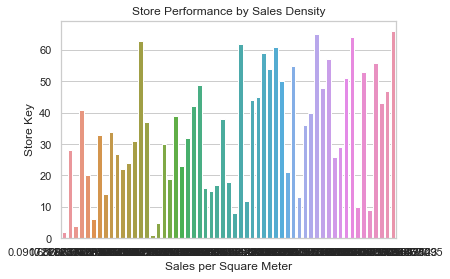

In [58]:
store_performance = pd.merge(sales_df, stores_df, on='Store Key')
store_sales_performance = store_performance.groupby('Store Key').agg({'Quantity': 'sum', 'Square Meters': 'first'})
store_sales_performance['Sales Density'] = store_sales_performance['Quantity'] / store_sales_performance['Square Meters']

sns.barplot(x=store_sales_performance['Sales Density'].values, y=store_sales_performance.index)
plt.title('Store Performance by Sales Density')
plt.xlabel('Sales per Square Meter')
plt.ylabel('Store Key')
plt.show()


# Geographical Analysis

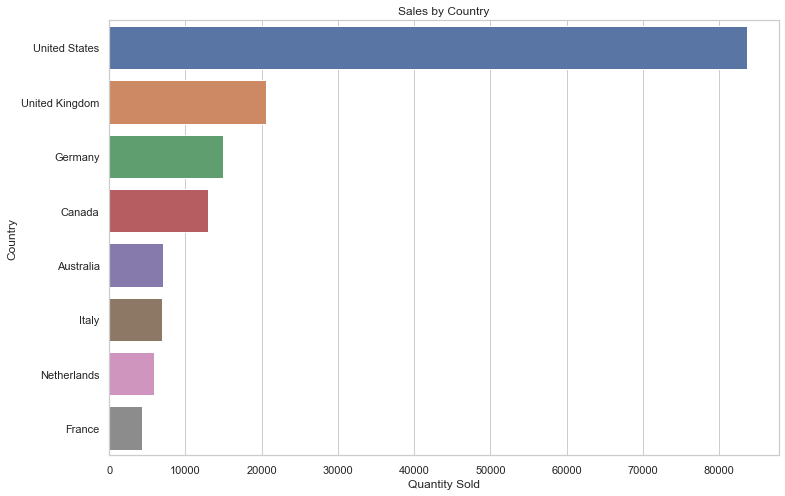

In [61]:
# Sales by Country
geo_sales = pd.merge(sales_df, stores_df, on='Store Key')
geo_sales = geo_sales.groupby('Country')['Quantity'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Quantity', y='Country', data=geo_sales.sort_values('Quantity', ascending=False))
plt.title('Sales by Country')
plt.xlabel('Quantity Sold')
plt.ylabel('Country')
plt.show()
